In [1]:
# import functions and cells
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

In [2]:
def initialize():
    global v, y, I, eps, a, b, vresult, yresult, dt, T
    
    T = 600
    dt = 0.1 # time step
    
    eps = 0.2
    a = 0.7
    b = 0.8

    v = -0.4 # initial voltage-like
    y = -0.62 # initial feedback-like
    
    I = 0 # current

    vresult = [v]
    yresult = [y]

In [3]:
def observe():
    global v, y, vresult, yresult
    vresult.append(v)
    yresult.append(y)

In [4]:
def update():
    global v, y, vresult, yresult
    vnew = v + dt * (v - v**3/3 - y + I)
    ynew = y + dt * (eps * (v + a - b*y))
    v, y = vnew, ynew

In [5]:
initialize()
for i in range(T):
    update()
    observe()

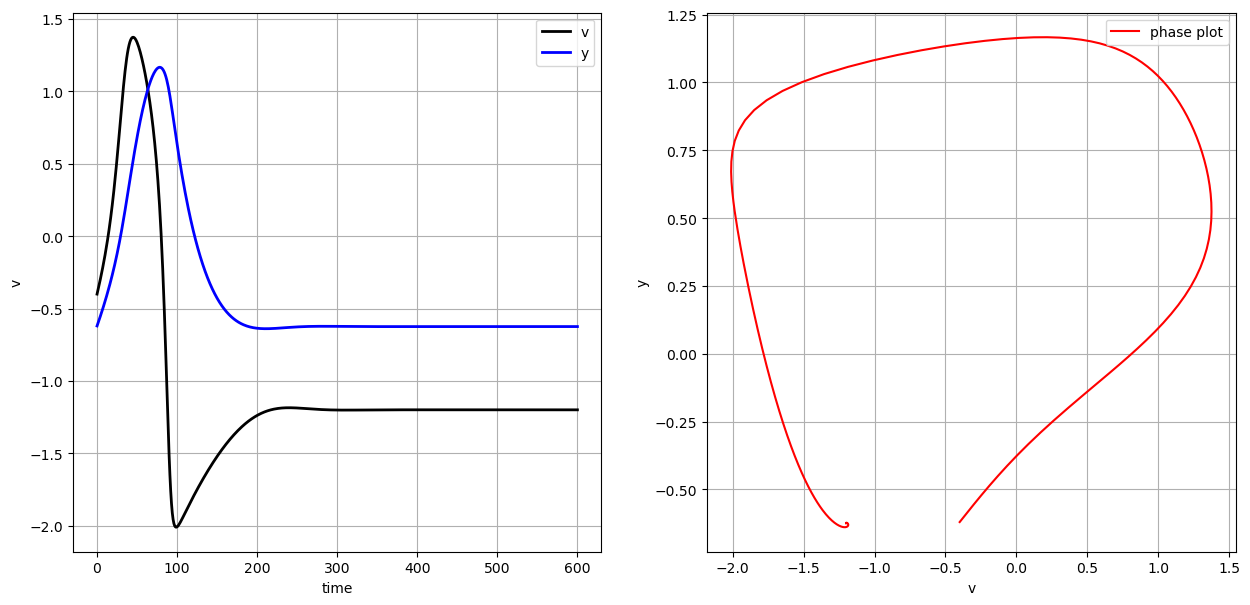

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].plot(vresult, 'k', linewidth=2, label='v')
axs[0].plot(yresult, 'b', linewidth=2, label='y')
axs[0].set_xlabel('time')
axs[0].set_ylabel('v')

axs[1].plot(vresult, yresult, 'r', label='phase plot')
axs[1].set_xlabel('v')
axs[1].set_ylabel('y')

for ax in axs:
    ax.grid()
    ax.legend()

In [ ]:
def run_simulation(eps, a, b, I, v_init, y_init):
    # Simulation settings
    T = 600
    dt = 0.1

    # Initialize variables
    v = v_init
    y = y_init

    vresult = [v]
    yresult = [y]

    # Define update rule
    for _ in range(T):
        v_new = v + dt * (v - v**3 / 3 - y + I)
        y_new = y + dt * (eps * (v + a - b * y))
        v, y = v_new, y_new
        vresult.append(v)
        yresult.append(y)

    # Plot results
    fig, axs = plt.subplots(1, 2, figsize=(15, 7))
    axs[0].plot(vresult, 'k', linewidth=2, label='v')
    axs[0].plot(yresult, 'b', linewidth=2, label='y')
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('v and y')
    axs[0].legend()
    axs[0].grid()

    axs[1].plot(vresult, yresult, 'r', label='phase plot')
    axs[1].set_xlabel('v')
    axs[1].set_ylabel('y')
    axs[1].legend()
    axs[1].grid()

    plt.show()

In [ ]:




# Interactive sliders
interact(
    run_simulation,
    eps=FloatSlider(min=0.01, max=1.0, step=0.01, value=0.2, description='eps'),
    a=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.7, description='a'),
    b=FloatSlider(min=0.0, max=1.5, step=0.05, value=0.8, description='b'),
    I=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='I'),
    v_init=FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.4, description='v₀'),
    y_init=FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.62, description='y₀'),
)
